<a href="https://colab.research.google.com/github/mukeshsharma1981/Uber-Data-Analysis/blob/main/UBER_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Business Objectives
## The aim of analysis is to identify the root cause of the problem (i.e. cancellation and
## non-availability of cars) and recommend ways to improve the situation. As a result of your
## analysis, you should be able to present to the client the root cause(s) and possible hypotheses
## of the problem(s) and recommend ways to improve them.

## 1. Request id: A unique identifier of the request
## 2. Time of request: The date and time at which the customer made the trip request
## 3. Drop-off time: The drop-off date and time, in case the trip was completed
## 4. Pick-up point: The point from which the request was made
## 5. Driver id: The unique identification number of the driver
## 6. Status of the request: The final status of the trip, that can be either completed, cancelled
## by the driver or no cars available

## Note: For this assignment, only the trips to and from the airport are being considered.

# New Section

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("Uber Request Data.csv")

In [5]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [6]:
## To check the unique records for Driver ID or Request ID
len(df["Request id"].unique())

6745

In [7]:
df.shape ## To check Dimension of the dataset

(6745, 6)

In [8]:
df.isnull().sum() ## To check total number of null values

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
## To get the percentage of the null values
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [11]:
## Request timestamp and Drop timestamp need to convert into datetime format
df["Request timestamp"].value_counts() ## Data is not consistant here. So we need to change the - into /

11/7/2016 19:02        6
11/7/2016 9:40         6
11/7/2016 8:37         6
11/7/2016 17:57        6
12/7/2016 21:07        5
                      ..
13-07-2016 20:57:49    1
15-07-2016 18:22:01    1
15-07-2016 22:02:01    1
12/7/2016 4:05         1
11/7/2016 4:49         1
Name: Request timestamp, Length: 5618, dtype: int64

In [12]:
pd.to_datetime(df["Request timestamp"]) ## data type has been changed to datetime64

0      2016-11-07 11:51:00
1      2016-11-07 17:57:00
2      2016-12-07 09:17:00
3      2016-12-07 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [13]:
df["Request timestamp"]=df["Request timestamp"].astype(str) ## Change the variable type

In [14]:
pd.to_datetime(df["Request timestamp"]).replace("/", "-")

0      2016-11-07 11:51:00
1      2016-11-07 17:57:00
2      2016-12-07 09:17:00
3      2016-12-07 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [15]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"], dayfirst=True)

In [16]:
df["Drop timestamp"].value_counts() ## Data is not consistant here. So we need to change the - into /

12/7/2016 21:04        4
11/7/2016 13:00        4
12/7/2016 21:53        4
12/7/2016 6:22         4
12/7/2016 22:51        3
                      ..
13-07-2016 14:37:56    1
11/7/2016 7:17         1
14-07-2016 03:44:55    1
12/7/2016 16:38        1
14-07-2016 22:30:11    1
Name: Drop timestamp, Length: 2598, dtype: int64

In [17]:
pd.to_datetime(df["Drop timestamp"]) ## data type has been changed to datetime64

0      2016-11-07 13:00:00
1      2016-11-07 18:47:00
2      2016-12-07 09:58:00
3      2016-12-07 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [18]:
df["Drop timestamp"]=df["Drop timestamp"].astype(str) ## Change the variable type

In [19]:
pd.to_datetime(df["Drop timestamp"]).replace("/", "-")

0      2016-11-07 13:00:00
1      2016-11-07 18:47:00
2      2016-12-07 09:58:00
3      2016-12-07 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [20]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"], dayfirst=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [22]:
## To Fetch hours from variable Request timestamp
req_hour=df["Request timestamp"].dt.hour

In [23]:
req_hour

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [24]:
len(req_hour)

6745

In [25]:
df["req_hour"]=req_hour

In [26]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [29]:
## To Fetch day from variable Request timestamp
req_day=df["Request timestamp"].dt.day
req_day

0       11
1       11
2       12
3       12
4       13
        ..
6740    15
6741    15
6742    15
6743    15
6744    15
Name: Request timestamp, Length: 6745, dtype: int64

In [30]:
len(req_day)

6745

In [31]:
df["req_day"]=req_day
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [35]:
## Importing seaborn
import seaborn as sns
import matplotlib.pyplot as plt

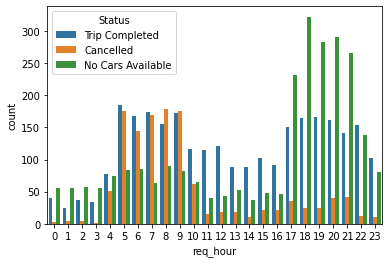

In [37]:
sns.countplot(x="req_hour", data=df, hue="Status")
plt.show()

In [ ]:
## From the above graph we can clearly see that mostly No Cars Available in evening and night after 5 PM  

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


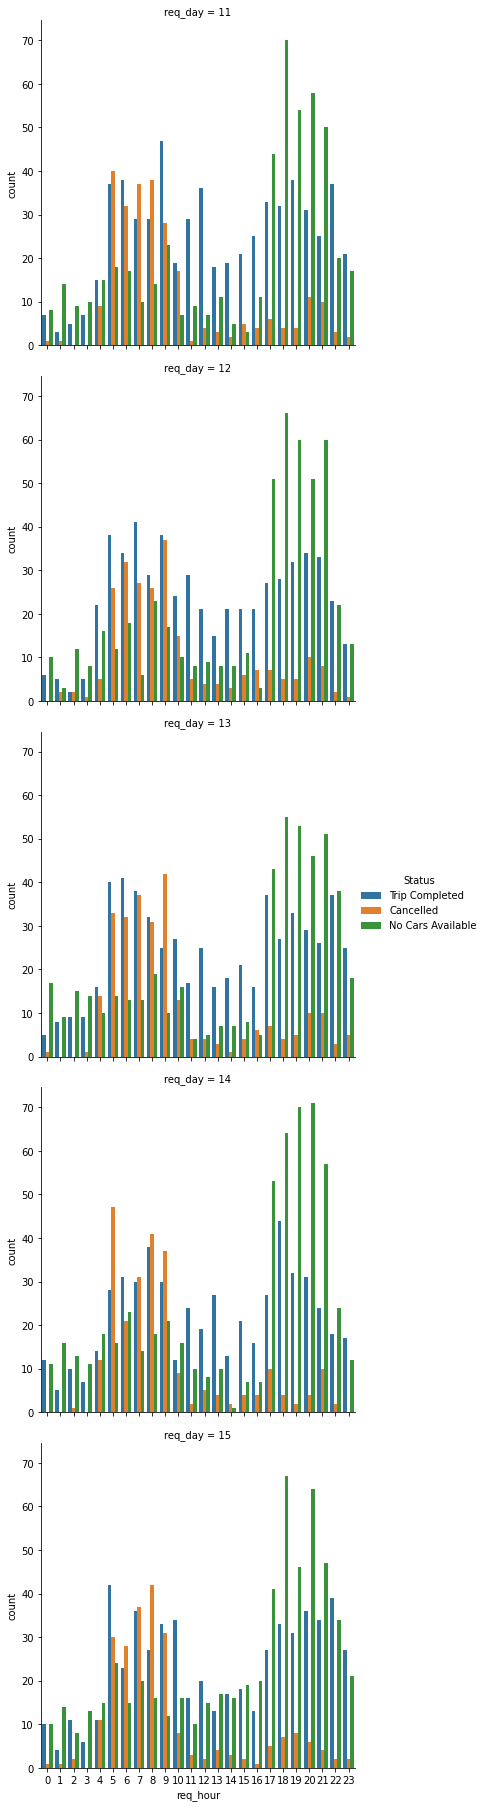

In [38]:
## Lets look at the same graph day wise also to check the trend
sns.factorplot(x="req_hour", data=df, hue="Status", kind="count", row="req_day")
plt.show()

In [ ]:
## We can see that No Cars Available after 5 pm till midnight for each day

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


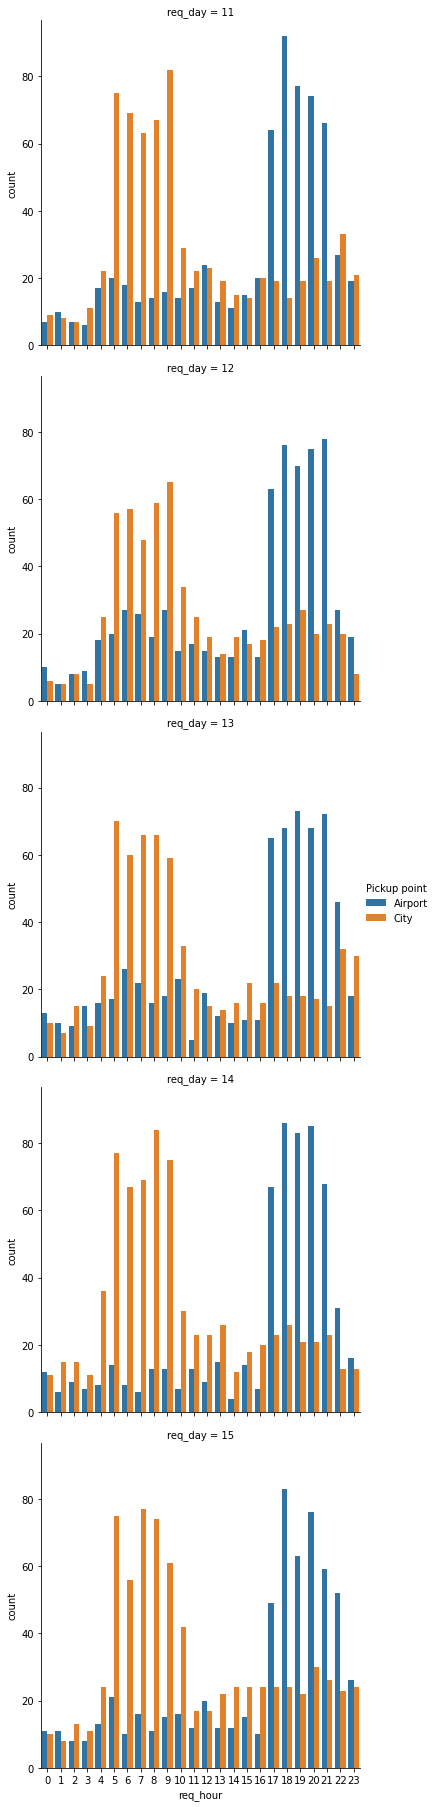

In [39]:
## To analyse the data based on Pickup Point
sns.factorplot(x="req_hour", data=df, hue="Pickup point", kind="count", row="req_day")
plt.show()

In [ ]:
## It seems that in the Night Airport has more request for cabs and during the day City requires more cabs

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


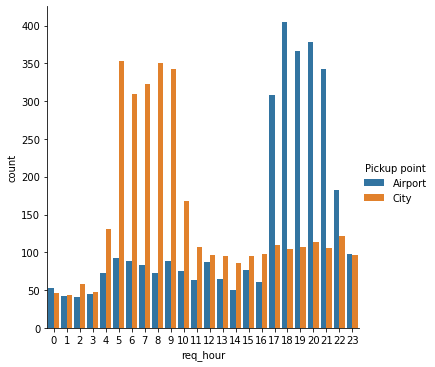

In [40]:
## To analyse the data based on Pickup Point in Total
sns.factorplot(x="req_hour", data=df, hue="Pickup point", kind="count")
plt.show()

In [43]:
df["Time_Slot"]=0
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0


In [47]:

## We will create groups based on req_hour because no column has been given
j=0
for i in df["req_hour"]:
  if df.iloc[j,6]<5:
    df.iloc[j,8]="Pre Morning"
  elif 5<=df.iloc[j,6]<10:
    df.iloc[j,8]="Morning Rush"
  elif 10<=df.iloc[j,6]<17:
    df.iloc[j,8]="Day Time"
  elif 17<=df.iloc[j,6]<22:
    df.iloc[j,8]="Evening Rush"
  else:
    df.iloc[j,8]="Late Night"

  j = j + 1


In [48]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush


In [50]:
df["Time_Slot"].value_counts()

Evening Rush    2342
Morning Rush    2103
Day Time        1224
Pre Morning      578
Late Night       498
Name: Time_Slot, dtype: int64

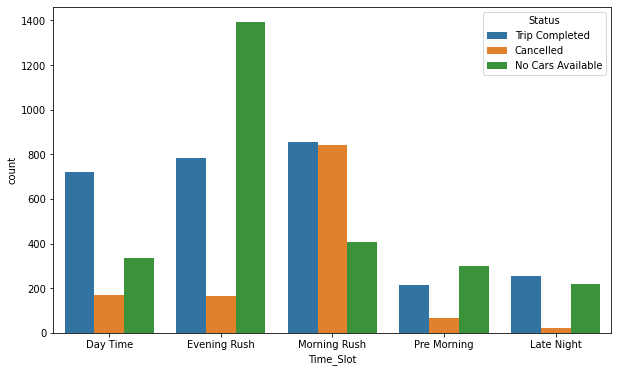

In [57]:
## Check the visualization for Time_slot
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot", data=df, hue="Status")
plt.show()

In [ ]:
## 1. We can conclude that most of the cars are not available in Evening Rush Time
## 2. Most of the cars were cancled in Morning Rush

In [75]:
## Lets Analyze Morning Rush only
df_morning_rush=df[df["Time_Slot"]=="Morning Rush"]

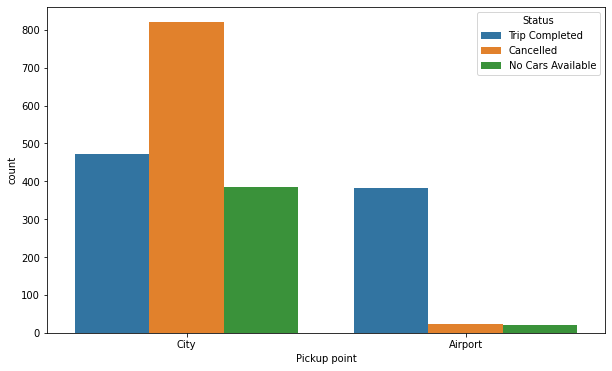

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point", data=df_morning_rush, hue="Status")
plt.show()

In [ ]:
## During Morning Time most of the trips canceled in the City

***Severity of problem by location and its counts (cancellation of cab as per the pickup location at the morning rush hours)***

In [77]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]

In [78]:
df_airport_cancelled.shape

(23, 9)

In [79]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [80]:
df_city_cancelled.shape

(820, 9)

**Supply & Demand for City in Morning Rush**

In [81]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [82]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

**Supply & Demand for Airport in Morning Rush**

In [83]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [84]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

Lets Analyze the same for Evening Rush

In [85]:
df_evening_rush=df[df["Time_Slot"]=="Evening Rush"]


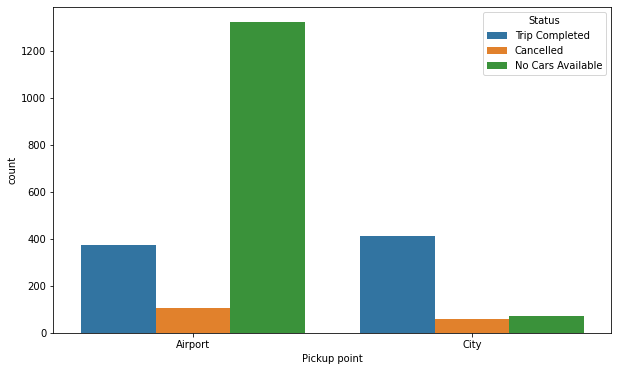

In [86]:
plt.figure(figsize=(10,6))
sns.countplot(x="Pickup point", data=df_evening_rush, hue="Status")
plt.show()


***Severity of problem by location and its counts (cancellation of cab as per the pickup location at the *Evening* rush hours)*** **bold text**


In [96]:
df_city_cancelled_ev=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]


In [95]:
df_city_cancelled_ev.shape[0]

60

In [97]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0] ## Demand for Evening Rush

542

In [101]:
## Supply for Evening Rush
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

**In Evening Rush the Demand is 542 cars**
**But the Supply is 411 for evening rush**

In [102]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0] ## Demand for Evening Rush

1800

In [103]:
## Supply for Evening Rush
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

Based on the results we can recommend the company that on Airport the demad is high 1800 and supply is 373. So you need
to fullfill the deman 

**Severity Porblem at each location by looking at cancellation of cabs in each of the pickup point**

In [104]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [105]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

**MORNING RUSH AIRPORT**

In [106]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [107]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [108]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [109]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

**MORNING RUSH CITY**

In [110]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]


1677

In [111]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]


820

In [112]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]


472

In [113]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]


385

In [118]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush


In [123]:
df_evening_city=df.loc[(df["Pickup point"]=="City") & (df["Time_Slot"]=="Evening Rush")]

In [124]:
df_evening_city.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening Rush
25,5254,City,3.0,Trip Completed,2016-07-14 21:23:03,2016-07-14 22:25:19,21,14,Evening Rush
40,1179,City,5.0,Trip Completed,2016-07-11 20:58:00,2016-07-11 21:45:00,20,11,Evening Rush
43,2559,City,5.0,Trip Completed,2016-07-12 21:32:00,2016-07-12 22:29:00,21,12,Evening Rush
52,3882,City,6.0,Trip Completed,2016-07-13 21:53:03,2016-07-13 22:45:24,21,13,Evening Rush


In [126]:
import pandas as pd

In [129]:
df_evening_city_count=pd.DataFrame(df_evening_city["Status"].value_counts())

In [131]:
df_evening_city_count

,Status
Trip Completed,411
No Cars Available,71
Cancelled,60


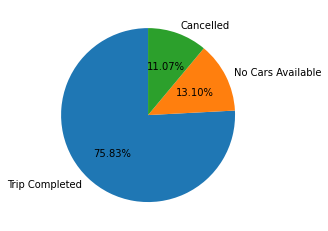

In [136]:
fig,ax=plt.subplots()
ax.pie(df_evening_city_count["Status"].values, labels=df_evening_city_count["Status"].index, 
       autopct="%.2f%%", startangle=90)
plt.show()

In [144]:
df_evening_airport=df.loc[(df["Pickup point"]=="Airport") & (df["Time_Slot"]=="Evening Rush")]

In [145]:
df_evening_airport_count=pd.DataFrame(df_evening_airport["Status"].value_counts())

In [146]:
df_evening_airport_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [147]:
df_evening_airport_count["Status"].values

array([1321,  373,  106])

In [148]:
df_evening_airport_count["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

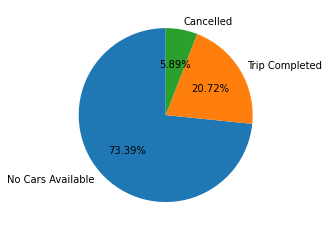

In [149]:
fig,ax=plt.subplots()
ax.pie(df_evening_airport_count["Status"].values, labels=df_evening_airport_count["Status"].index, 
       autopct="%.2f%%", startangle=90)
plt.show()

In [ ]:
1. They could be given a bonus for each trip they complete from the city to the airport in the morning rush. This will ensure less number of trips are calcelled
2. Uber can pay for the gas milage of drivers to come back to the city without a ride
3. Drivers can again be given bonus to complete a trip from the airport in the evening. This will increase the supply at the airport.
4. Another way could be to increase licences of car pooling taxis so that lesser number of cars serve more passengers
